# アミノ酸配列のグラフ表示画像のTransformerによるタンパク質ファミリー分類（5分割交差検証）

## 1. 画像とラベルの対応を取る `Dataset` を作成

In [1]:
from torch.utils.data import Dataset
from PIL import Image

import os

label2id = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4}
id2label = {v: k for k, v in label2id.items()}

class GPCRImageDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        self.data = pd.read_csv(csv_path, header=None, names=["num", "label", "accession"])
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.img_dir, f"{row['num']}.png")
        image = Image.open(img_path).convert("RGB")
        label = label2id[row["label"]]

        if self.transform:
            image = self.transform(image)

        return {
            "pixel_values": image,
            "label": label
        }

## 2. 画像前処理（ViT用）

In [2]:
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
# from transformers import AutoImageProcessor
from transformers import ViTImageProcessorFast, ViTForImageClassification

processor = ViTImageProcessorFast.from_pretrained("google/vit-base-patch16-224-in21k")
transform = Compose([
    Resize((224, 224)),
    ToTensor(),
    Normalize(mean=processor.image_mean, std=processor.image_std)
])

## 3. `Trainer` を使って学習

[Fold 1 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_57324\3512132755.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.215784,0.946244,0.945260
2,No log,0.165753,0.951425,0.949727
3,0.247600,0.139117,0.968912,0.966264
4,0.247600,0.102585,0.977332,0.976191
5,0.247600,0.096053,0.977332,0.976416
6,0.056500,0.099765,0.974093,0.972930
7,0.056500,0.107639,0.970855,0.970303
8,0.024500,0.093316,0.978627,0.978451
9,0.024500,0.099368,0.973446,0.972993
10,0.024500,0.103395,0.972798,0.972314


Fold 1 F1 Score: 0.9723
Confusion Matrix:
 [[1040    2   14    0    0]
 [   9   81    4    0    0]
 [  10    1  377    0    0]
 [   0    0    2    1    0]
 [   0    0    0    0    3]]
              precision    recall  f1-score      support
A              0.982059  0.984848  0.983452  1056.000000
B              0.964286  0.861702  0.910112    94.000000
C              0.949622  0.971649  0.960510   388.000000
D              1.000000  0.333333  0.500000     3.000000
E              1.000000  1.000000  1.000000     3.000000
accuracy       0.972798  0.972798  0.972798     0.972798
macro avg      0.979193  0.830307  0.870815  1544.000000
weighted avg   0.972895  0.972798  0.972314  1544.000000


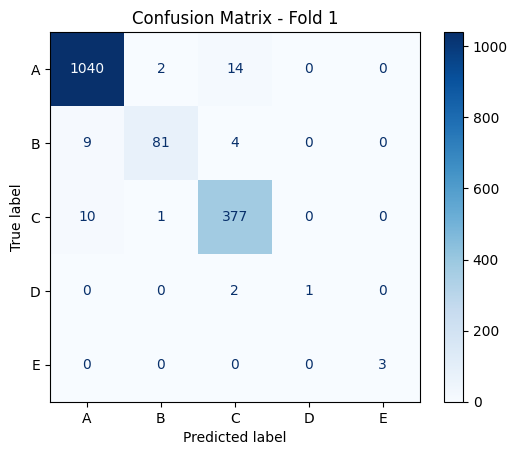

[Fold 2 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_57324\3512132755.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.196075,0.953338,0.951237
2,No log,0.190965,0.950097,0.947721
3,0.234300,0.189736,0.955282,0.953582
4,0.234300,0.137840,0.968244,0.967693
5,0.234300,0.166964,0.964355,0.963272
6,0.052600,0.148083,0.967596,0.967048
7,0.052600,0.181435,0.962411,0.961321
8,0.020300,0.168947,0.965651,0.964971
9,0.020300,0.170969,0.966299,0.965671
10,0.020300,0.170248,0.966299,0.965671


Fold 2 F1 Score: 0.9657
Confusion Matrix:
 [[1046    2   17    0    0]
 [  12   80    4    0    0]
 [  11    2  362    1    0]
 [   0    0    2    0    0]
 [   1    0    0    0    3]]
              precision    recall  f1-score      support
A              0.977570  0.982160  0.979859  1065.000000
B              0.952381  0.833333  0.888889    96.000000
C              0.940260  0.962766  0.951380   376.000000
D              0.000000  0.000000  0.000000     2.000000
E              1.000000  0.750000  0.857143     4.000000
accuracy       0.966299  0.966299  0.966299     0.966299
macro avg      0.774042  0.705652  0.735454  1543.000000
weighted avg   0.965702  0.966299  0.965671  1543.000000


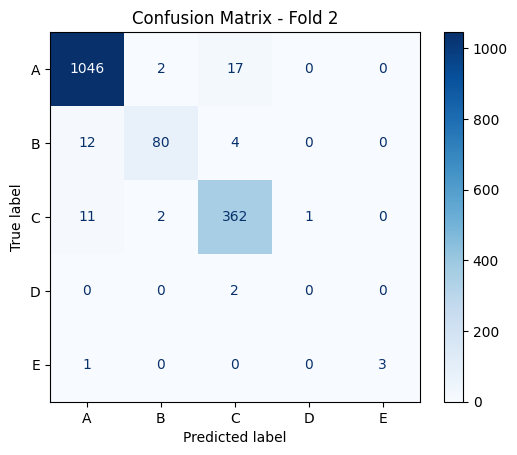

[Fold 3 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_57324\3512132755.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.243378,0.931951,0.930312
2,No log,0.166325,0.957226,0.954282
3,0.232800,0.170862,0.955930,0.953084
4,0.232800,0.169943,0.962411,0.961603
5,0.232800,0.158680,0.964355,0.965472
6,0.051100,0.156728,0.965003,0.966583
7,0.051100,0.176690,0.961763,0.962472
8,0.020800,0.162773,0.963707,0.965453
9,0.020800,0.168091,0.964355,0.965194
10,0.020800,0.172397,0.963059,0.964853


Fold 3 F1 Score: 0.9649
Confusion Matrix:
 [[1043    0   14    0    0]
 [   7   74   14    0    0]
 [  11    1  366    6    0]
 [   0    0    0    0    0]
 [   0    0    1    3    3]]
              precision    recall  f1-score      support
A              0.983035  0.986755  0.984891  1057.000000
B              0.986667  0.778947  0.870588    95.000000
C              0.926582  0.953125  0.939666   384.000000
D              0.000000  0.000000  0.000000     0.000000
E              1.000000  0.428571  0.600000     7.000000
accuracy       0.963059  0.963059  0.963059     0.963059
macro avg      0.779257  0.629480  0.679029  1543.000000
weighted avg   0.969286  0.963059  0.964853  1543.000000


E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


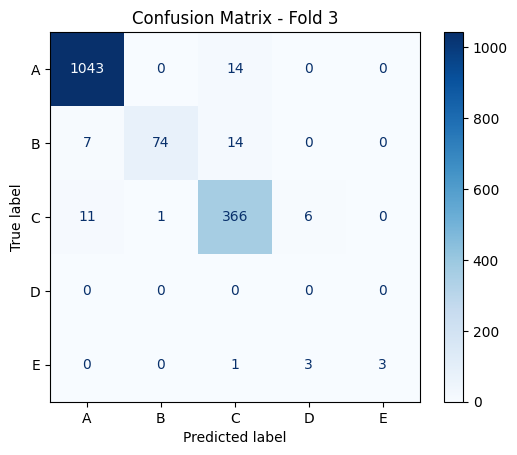

[Fold 4 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_57324\3512132755.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.222571,0.946209,0.943655
2,No log,0.185037,0.946209,0.945237
3,0.237700,0.178658,0.952690,0.950266
4,0.237700,0.146861,0.959819,0.958891
5,0.237700,0.191428,0.959819,0.957708
6,0.055500,0.206401,0.956578,0.954426
7,0.055500,0.174164,0.963059,0.961326
8,0.021500,0.175229,0.963707,0.962255
9,0.021500,0.165705,0.965003,0.964649
10,0.021500,0.173687,0.965651,0.963934


Fold 4 F1 Score: 0.9639
Confusion Matrix:
 [[1050    1   12    0    0]
 [   2   69    6    0    0]
 [  23    4  370    0    0]
 [   0    0    5    0    0]
 [   0    0    0    0    1]]
              precision    recall  f1-score      support
A              0.976744  0.987770  0.982226  1063.000000
B              0.932432  0.896104  0.913907    77.000000
C              0.941476  0.931990  0.936709   397.000000
D              0.000000  0.000000  0.000000     5.000000
E              1.000000  1.000000  1.000000     1.000000
accuracy       0.965651  0.965651  0.965651     0.965651
macro avg      0.770130  0.763173  0.766569  1543.000000
weighted avg   0.962309  0.965651  0.963934  1543.000000


E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


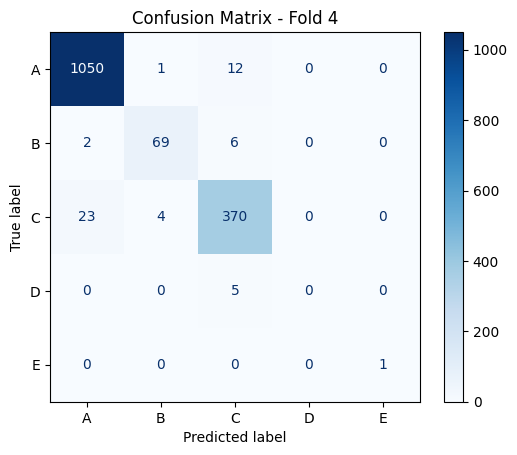

[Fold 5 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_57324\3512132755.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.175513,0.957226,0.954878
2,No log,0.210964,0.945561,0.942748
3,0.241200,0.127240,0.969540,0.967630
4,0.241200,0.132968,0.965651,0.964264
5,0.241200,0.101668,0.973428,0.972586
6,0.058500,0.119853,0.968244,0.967597
7,0.058500,0.109003,0.973428,0.972272
8,0.022000,0.103387,0.974076,0.972953
9,0.022000,0.110613,0.973428,0.972400
10,0.022000,0.108029,0.975373,0.974359


Fold 5 F1 Score: 0.9744
Confusion Matrix:
 [[1045    4   12    0    0]
 [   3   80    9    0    0]
 [   7    0  377    0    0]
 [   0    0    3    0    0]
 [   0    0    0    0    3]]
              precision    recall  f1-score      support
A              0.990521  0.984920  0.987713  1061.000000
B              0.952381  0.869565  0.909091    92.000000
C              0.940150  0.981771  0.960510   384.000000
D              0.000000  0.000000  0.000000     3.000000
E              1.000000  1.000000  1.000000     3.000000
accuracy       0.975373  0.975373  0.975373     0.975373
macro avg      0.776610  0.767251  0.771463  1543.000000
weighted avg   0.973804  0.975373  0.974359  1543.000000


E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


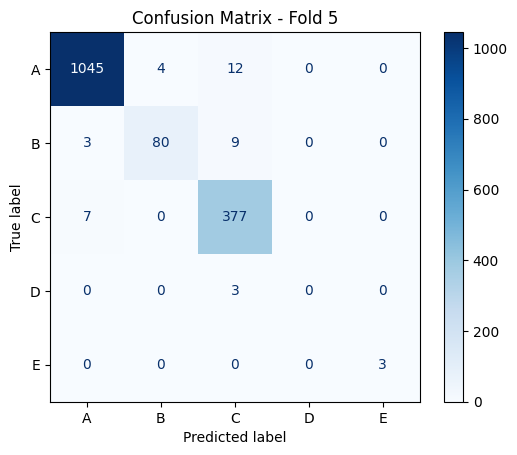


Average F1 Score: 0.9682262929945711
Confusion Matrix:
 [[5224    9   69    0    0]
 [  33  384   37    0    0]
 [  62    8 1852    7    0]
 [   0    0   12    1    0]
 [   1    0    1    3   13]]


In [5]:
from transformers import TrainingArguments, Trainer
import matplotlib.pyplot as plt
import numpy as np
import evaluate
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from torch.utils.data import Subset
import pandas as pd

accuracy = evaluate.load("accuracy")

# 5分割交差検証の設定
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

dataset = GPCRImageDataset("../gpcr_labels.csv", "../graphs", transform=transform)

all_f1_scores = []
all_conf_matrices = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
    print(f"\033[34m[Fold {fold+1} / 5]\033[0m")

    # Subset 作成
    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)

    # モデルを毎回初期化
    model = ViTForImageClassification.from_pretrained(
        "google/vit-base-patch16-224-in21k",
        num_labels=5,
        id2label=id2label,
        label2id=label2id
    )

    training_args = TrainingArguments(
        output_dir=f"./vit-gpcr-fold{fold}",
        per_device_train_batch_size=32,
        eval_strategy="epoch",
        save_strategy="epoch",
        num_train_epochs=10,
        logging_dir="./logs",
        report_to="none"
    )

    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        preds = np.argmax(logits, axis=-1)
        f1 = f1_score(labels, preds, average="weighted")
        return {
            "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
            "f1": f1
        }

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=processor,
        compute_metrics=compute_metrics
    )

    trainer.train()

    # 推論 & 評価
    preds = trainer.predict(val_dataset)
    y_true = preds.label_ids
    y_pred = np.argmax(preds.predictions, axis=1)

    # ラベルIDのリストを明示的に渡す
    label_ids = list(range(len(label2id)))  # [0, 1, 2, 3, 4]
    display_names = list(label2id.keys())  # ["A", "B", "C", "D", "E"]

    f1 = f1_score(y_true, y_pred, average="weighted")
    cm = confusion_matrix(y_true, y_pred, labels=label_ids)

    report = classification_report(y_true, y_pred, target_names=display_names, output_dict=True)
    report_df = pd.DataFrame(report).T

    print(f"Fold {fold+1} F1 Score: \033[32m{f1:.4f}\033[0m")
    print("Confusion Matrix:\n", cm)
    print(report_df)

    all_f1_scores.append(f1)
    all_conf_matrices.append(cm)

    # 混同行列を可視化
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_names)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - Fold {fold+1}")
    plt.show()

# 最終結果をまとめる
print("\nAverage F1 Score:", np.mean(all_f1_scores))
print("Confusion Matrix:\n", sum(all_conf_matrices))